In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
# 한글깨짐 방지 실행
!python han-font.py
exec(open('han-font.py').read())

data=pd.read_csv('bodymeasure.csv',encoding='CP949')
data.head()

,신장,가슴둘레,허리둘레,엉덩이둘레,어깨너비,바깥소매길이,배꼽높이,치골높이,성별,연령
0,162.4,79.8,67.0,84.3,41.7,53.7,97.4,77.9,남자,15
1,166.5,82.3,68.7,86.1,42.3,54.7,98.6,78.9,남자,16
2,167.0,83.1,69.0,86.5,42.3,54.7,98.6,78.9,남자,17
3,167.9,85.0,70.4,87.5,43.1,54.9,99.1,78.2,남자,18
4,168.3,85.7,71.3,87.9,43.3,55.1,99.3,78.9,남자,19


,신장,가슴둘레,허리둘레,엉덩이둘레,어깨너비,바깥소매길이,배꼽높이,치골높이,연령
신장,1.000,0.418,0.408,-0.074,0.920,0.967,0.966,0.923,-0.111
가슴둘레,0.418,1.000,0.946,0.835,0.434,0.485,0.210,0.128,0.795
허리둘레,0.408,0.946,1.000,0.773,0.359,0.525,0.180,0.085,0.840
엉덩이둘레,-0.074,0.835,0.773,1.000,0.053,0.021,-0.286,-0.353,0.912
어깨너비,0.920,0.434,0.359,0.053,1.000,0.861,0.901,0.870,-0.114
바깥소매길이,0.967,0.485,0.525,0.021,0.861,1.000,0.894,0.837,0.033
배꼽높이,0.966,0.210,0.180,-0.286,0.901,0.894,1.000,0.982,-0.345
치골높이,0.923,0.128,0.085,-0.353,0.870,0.837,0.982,1.000,-0.424
연령,-0.111,0.795,0.840,0.912,-0.114,0.033,-0.345,-0.424,1.000


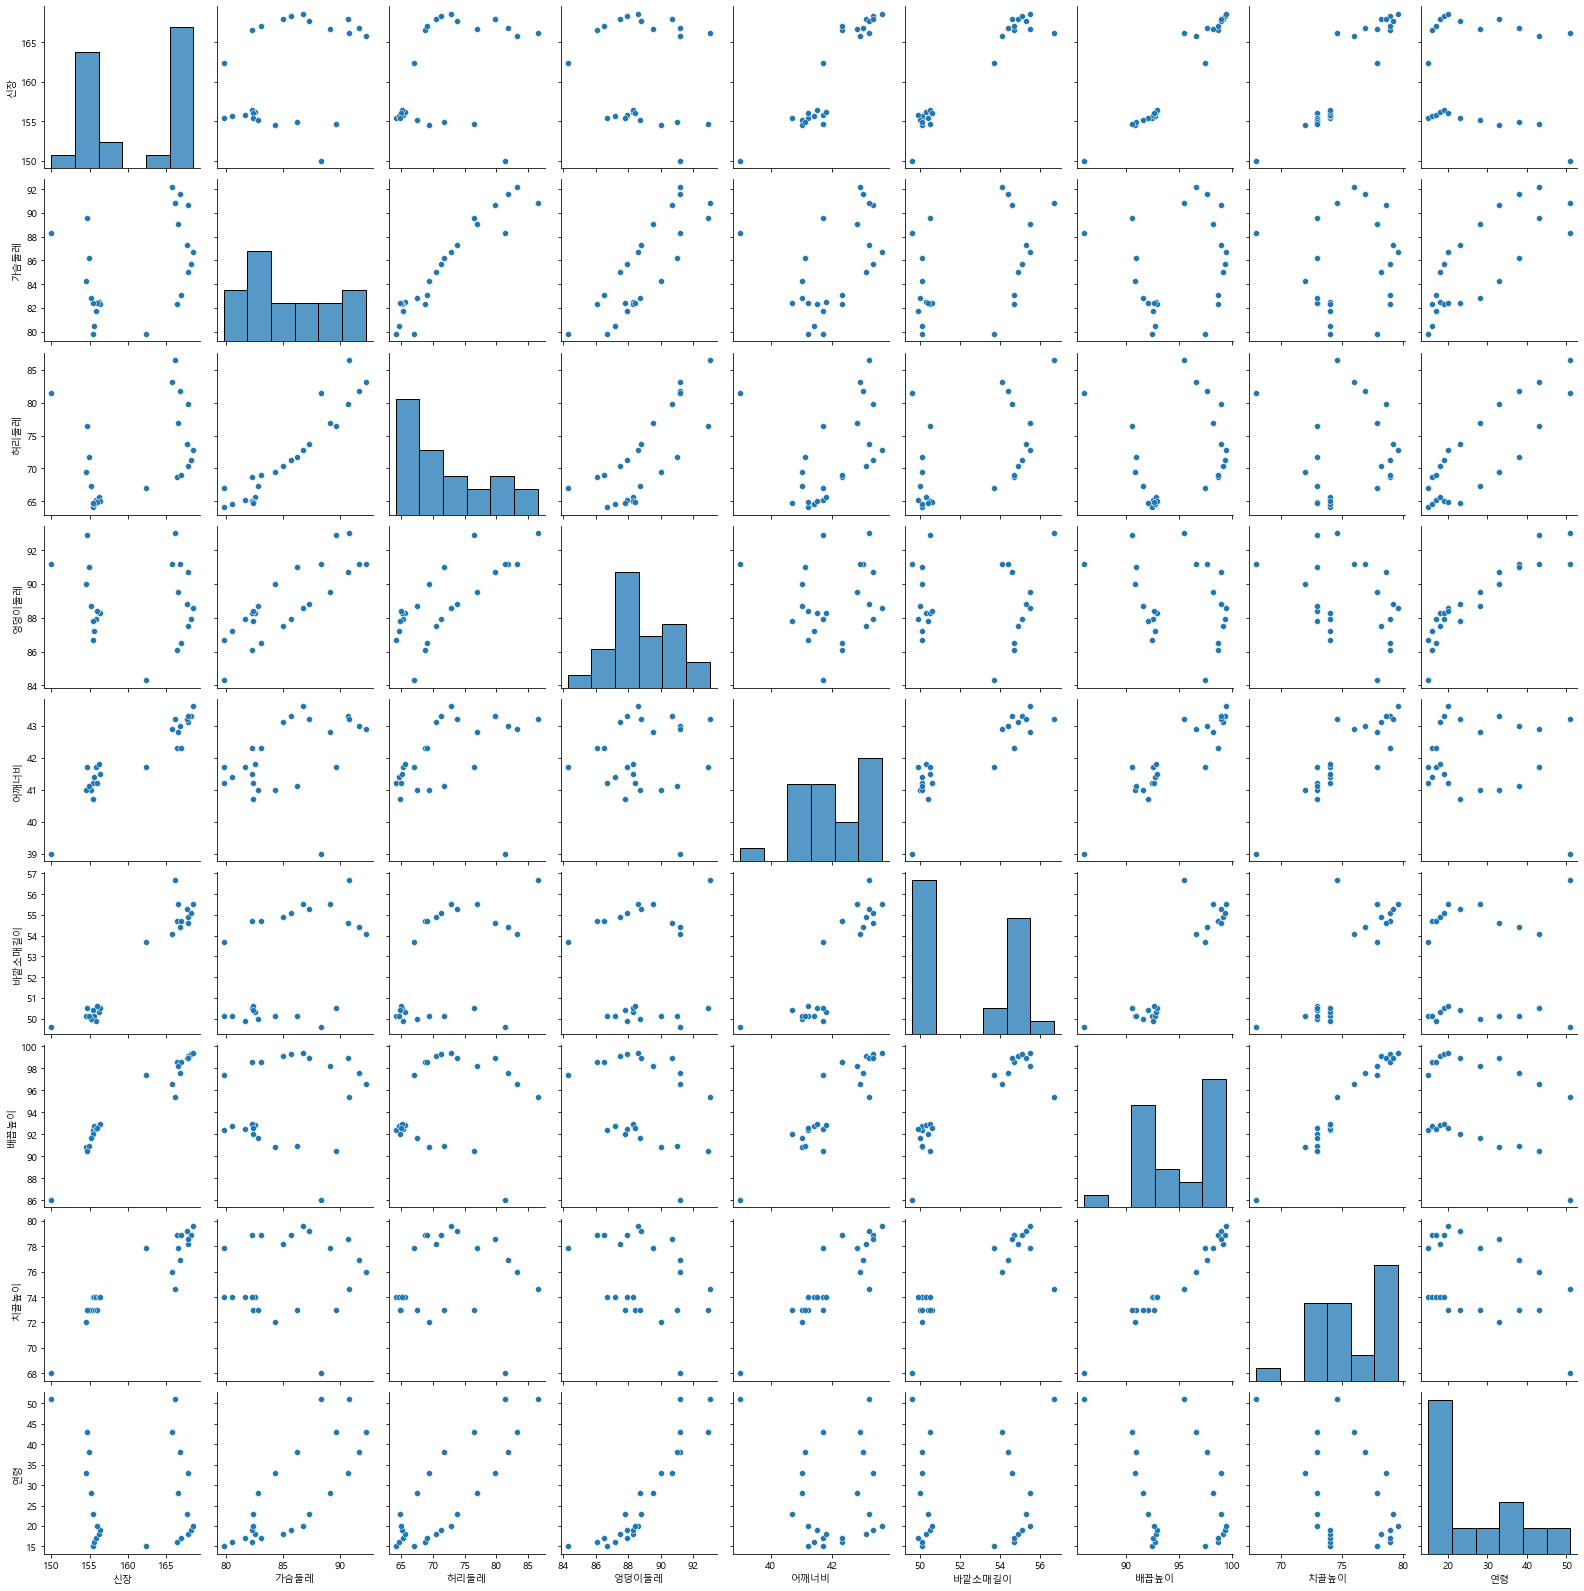

In [17]:
import seaborn as sns
sns.pairplot(data = data)
data.corr().round(3)

In [14]:
# 다중회귀모형분석(full-model)
fit1=smf.ols('신장~가슴둘레+허리둘레+엉덩이둘레+어깨너비+바깥소매길이+배꼽높이+치골높이', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                     신장   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     448.3
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.85e-17
Time:                        16:26:09   Log-Likelihood:                -14.089
No. Observations:                  24   AIC:                             44.18
Df Residuals:                      16   BIC:                             53.60
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8012     20.202     -0.386      0.7

In [3]:
# vif-통계량 계산
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [4]:
# x-y 추출
y_target=data['신장']
x_data = data.drop(['신장','성별','연령'],axis=1,inplace=False)
y, X = dmatrices('y_target ~ x_data', data, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,34475.958216,Intercept
1,60.419170,x_data[0]
2,29.255720,x_data[1]
3,47.568991,x_data[2]
4,27.748105,x_data[3]
5,27.797554,x_data[4]
6,142.500648,x_data[5]
7,39.346636,x_data[6]


In [5]:
# X-Y변수 추출
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = x_data
y = y_target
# 표준화(Z)
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

In [6]:
# PCA모듈설치 및 PCA분석+주성분의 회귀계수를 데이터프레임으로 구성
from sklearn.decomposition import PCA
pca = PCA(n_components=3)   # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = 
                           ['principal component1',
                            'principal component2',
                            'principal component3'])

principalDf.head()   # 주성분들의 점수

,principal component1,principal component2,principal component3
0,0.054591,-2.788321,1.013235
1,-1.024781,-2.119445,0.552761
2,-1.116106,-1.884001,0.480863
3,-1.707163,-1.301170,-0.031135
4,-2.065713,-1.148779,-0.149358


In [7]:
print(pca.explained_variance_ratio_)

[0.5771687  0.37316055 0.03323373]


In [8]:
sum(pca.explained_variance_ratio_)   # 누적설명력

0.9835629771769795

In [23]:
print(pca.components_)   # 주성분분석 : 고유벡터(주성분 식의 계수값

[[-0.30209752 -0.28907876 -0.07740014 -0.46593017 -0.47705427 -0.44484685
  -0.42026105]
 [ 0.48191733  0.47803444  0.59252649 -0.09995068 -0.06044029 -0.27187759
  -0.3171601 ]
 [-0.03130203  0.48900793 -0.46076718 -0.59349974  0.43492754  0.01223307
  -0.07766255]]


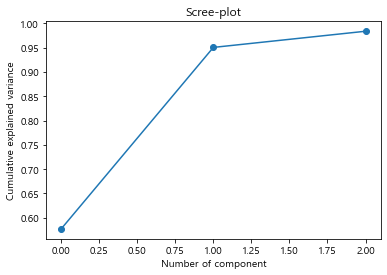

In [25]:
# scree-plot
import numpy as np
import matplotlib.pylab as plt
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.title('Scree-plot')
plt.xlabel('Number of component')
plt.ylabel('Cumulative explained variance')
plt.plot(exp_var_cum, 'o-')

In [26]:
# 주성분을 2개로 정하고 다시 PCA분석
pca = PCA(n_components=2)  
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = 
                           ['principal component1', 'principal component2'])
print(pca.components_)

[[-0.30209752 -0.28907876 -0.07740014 -0.46593017 -0.47705427 -0.44484685
  -0.42026105]
 [ 0.48191733  0.47803444  0.59252649 -0.09995068 -0.06044029 -0.27187759
  -0.3171601 ]]


In [27]:
# 주성분의 적절한 이름을 붙여 새로운 변수 생성
data['size']=principalDf['principal component1']
data['shape']=principalDf['principal component2']
data

,신장,가슴둘레,허리둘레,엉덩이둘레,어깨너비,바깥소매길이,배꼽높이,치골높이,성별,연령,size,shape
0,162.4,79.8,67.0,84.3,41.7,53.7,97.4,77.9,남자,15,0.054591,-2.788321
1,166.5,82.3,68.7,86.1,42.3,54.7,98.6,78.9,남자,16,-1.024781,-2.119445
2,167.0,83.1,69.0,86.5,42.3,54.7,98.6,78.9,남자,17,-1.116106,-1.884001
3,167.9,85.0,70.4,87.5,43.1,54.9,99.1,78.2,남자,18,-1.707163,-1.301170
4,168.3,85.7,71.3,87.9,43.3,55.1,99.3,78.9,남자,19,-2.065713,-1.148779
5,168.6,86.7,72.8,88.6,43.6,55.5,99.4,79.6,남자,20,-2.555132,-0.837575
6,167.7,87.3,73.7,88.8,43.2,55.3,98.9,79.2,남자,23,-2.321239,-0.518663
7,166.6,89.1,76.9,89.5,42.8,55.5,98.2,77.9,남자,28,-2.226674,0.360542
8,167.9,90.7,79.8,90.7,43.3,54.6,98.9,78.6,남자,33,-2.747230,0.958700
9,166.8,91.6,81.8,91.2,43.0,54.4,97.6,76.9,남자,38,-2.356526,1.669311


<AxesSubplot:xlabel='연령', ylabel='shape'>

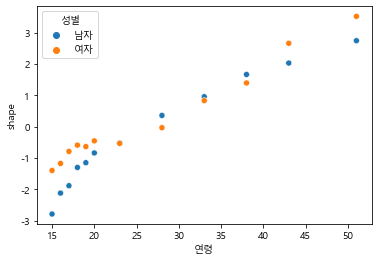

In [29]:
# 주성분에 따른 산점도
import seaborn as sns
sns.scatterplot(x='연령', y='shape', hue='성별', data=data)

In [30]:
# stack-자료의 unstack 독립 T검정
male=data.loc[(data.성별=='남자'),]
female=data.loc[(data.성별=='여자'),]
male

,신장,가슴둘레,허리둘레,엉덩이둘레,어깨너비,바깥소매길이,배꼽높이,치골높이,성별,연령,size,shape
0,162.4,79.8,67.0,84.3,41.7,53.7,97.4,77.9,남자,15,0.054591,-2.788321
1,166.5,82.3,68.7,86.1,42.3,54.7,98.6,78.9,남자,16,-1.024781,-2.119445
2,167.0,83.1,69.0,86.5,42.3,54.7,98.6,78.9,남자,17,-1.116106,-1.884001
3,167.9,85.0,70.4,87.5,43.1,54.9,99.1,78.2,남자,18,-1.707163,-1.301170
4,168.3,85.7,71.3,87.9,43.3,55.1,99.3,78.9,남자,19,-2.065713,-1.148779
5,168.6,86.7,72.8,88.6,43.6,55.5,99.4,79.6,남자,20,-2.555132,-0.837575
6,167.7,87.3,73.7,88.8,43.2,55.3,98.9,79.2,남자,23,-2.321239,-0.518663
7,166.6,89.1,76.9,89.5,42.8,55.5,98.2,77.9,남자,28,-2.226674,0.360542
8,167.9,90.7,79.8,90.7,43.3,54.6,98.9,78.6,남자,33,-2.747230,0.958700
9,166.8,91.6,81.8,91.2,43.0,54.4,97.6,76.9,남자,38,-2.356526,1.669311


In [31]:
from scipy import stats
from scipy.stats import ttest_ind
test=stats.levene(male['size'], female['size'])
ttest=ttest_ind(male['size'], female['size'], equal_var=True)
print("statistic=%.3f, p-value=%.3f" % test) 
print("statistic=%.3f, p-value=%.3f" % ttest) 

statistic=0.568, p-value=0.459
statistic=-12.981, p-value=0.000


In [32]:
test=stats.levene(male['shape'], female['shape'])
ttest=ttest_ind(male['shape'], female['shape'], equal_var=True)
print("statistic=%.3f, p-value=%.3f" % test) 
print("statistic=%.3f, p-value=%.3f" % ttest)

statistic=0.544, p-value=0.469
statistic=-0.691, p-value=0.497


In [9]:
### iris-data 주성분분석
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
iris = load_iris()
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(data=iris.data, columns=cols)
df["target"]=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


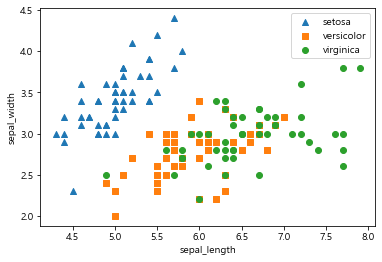

In [11]:
# sepal_length & sepal_width 산점도
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df[df["target"] ==i]["sepal_length"]
    y_val = df[df["target"]==i]["sepal_width"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [17]:
# PCA - 표준화 후 주성분=2로 분석한 결과
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print(df_pca.shape)

(150, 2)


In [18]:
# 주성분 2개로 분류할 경우
cols = ["pc1", "pc2"]
df_pca = pd.DataFrame(data=df_pca, columns=cols)
df_pca["target"] = iris.target

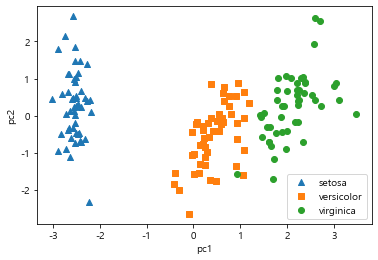

In [19]:
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca["target"] ==i]["pc1"]
    y_val = df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

In [20]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]
